Name : Karan Kumar

Student Id: 27623092

FIT5149 Assesment 1

### Task 1 : EDA

In [1]:
#loading all the required libraries
library('psych')
library(ggplot2)
library(reshape2)
library(car)
library('gridExtra')
library('dplyr')


Attaching package: ‘ggplot2’

The following objects are masked from ‘package:psych’:

    %+%, alpha


Attaching package: ‘car’

The following object is masked from ‘package:psych’:

    logit


Attaching package: ‘dplyr’

The following object is masked from ‘package:gridExtra’:

    combine

The following object is masked from ‘package:car’:

    recode

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [2]:
data <- read.csv("training.csv") ##Reading the housing data
dim(data) ## checking the dimensions of data
head(data) ##checking the first 6 rows of data

[1] 10000    11

id,price,bedrooms,bathrooms,sqft_living,sqft_lot,waterfront,condition,grade,yr_built,zipcode
5537200043,211000,4,1.00,2100,9200,0,3,7,1959,98168
2025700080,265000,3,2.50,1530,6000,0,4,7,1991,98038
2025049111,1440000,3,3.50,3870,3819,0,3,11,2002,98102
9482700075,800000,4,3.50,2370,3302,0,3,8,1926,98103
2856102105,1059500,5,3.25,3230,3825,0,3,9,2014,98117
3364900375,750000,2,1.00,1620,6120,0,3,7,1951,98115


In [3]:
str(data) #structure of data 

'data.frame':	10000 obs. of  11 variables:
 $ id         : num  5.54e+09 2.03e+09 2.03e+09 9.48e+09 2.86e+09 ...
 $ price      : int  211000 265000 1440000 800000 1059500 750000 229000 271115 428000 1240000 ...
 $ bedrooms   : int  4 3 3 4 5 2 3 2 3 4 ...
 $ bathrooms  : num  1 2.5 3.5 3.5 3.25 1 1.5 1.5 2.25 3.5 ...
 $ sqft_living: int  2100 1530 3870 2370 3230 1620 1200 830 2600 3820 ...
 $ sqft_lot   : int  9200 6000 3819 3302 3825 6120 5000 1325 15000 13224 ...
 $ waterfront : int  0 0 0 0 0 0 0 0 0 0 ...
 $ condition  : int  3 4 3 3 3 3 3 3 3 3 ...
 $ grade      : int  7 7 11 8 9 7 6 7 9 10 ...
 $ yr_built   : int  1959 1991 2002 1926 2014 1951 1979 2005 1978 1990 ...
 $ zipcode    : int  98168 98038 98102 98103 98117 98115 98146 98136 98038 98004 ...


In [4]:
summary(data) # stats about the data

       id                price            bedrooms        bathrooms    
 Min.   :1.000e+06   Min.   :  78000   Min.   : 0.000   Min.   :0.000  
 1st Qu.:2.126e+09   1st Qu.: 320000   1st Qu.: 3.000   1st Qu.:1.750  
 Median :3.905e+09   Median : 450000   Median : 3.000   Median :2.250  
 Mean   :4.591e+09   Mean   : 541434   Mean   : 3.373   Mean   :2.113  
 3rd Qu.:7.304e+09   3rd Qu.: 649950   3rd Qu.: 4.000   3rd Qu.:2.500  
 Max.   :9.842e+09   Max.   :6885000   Max.   :10.000   Max.   :8.000  
  sqft_living       sqft_lot        waterfront       condition    
 Min.   :  370   Min.   :   520   Min.   :0.0000   Min.   :1.000  
 1st Qu.: 1430   1st Qu.:  5058   1st Qu.:0.0000   1st Qu.:3.000  
 Median : 1920   Median :  7620   Median :0.0000   Median :3.000  
 Mean   : 2080   Mean   : 14947   Mean   :0.0077   Mean   :3.407  
 3rd Qu.: 2545   3rd Qu.: 10642   3rd Qu.:0.0000   3rd Qu.:4.000  
 Max.   :13540   Max.   :982998   Max.   :1.0000   Max.   :5.000  
     grade           yr_bui

In [5]:
rapply(data,function(x)length(unique(x))) # to find the total unique values in each attribute

id       price    bedrooms   bathrooms sqft_living    sqft_lot 
       9964        2526          11          26         744        5712 
 waterfront   condition       grade    yr_built     zipcode 
          2           5          11         116          70

### Summary of the attributes

1) Id : Categorical and Nominal :- It is the unique id related with each property and contains duplicates

2) price: Numerical and continuous :- The predictor variable gives the price of the house

3) bedrooms : Numerical and discrete: Gives the number of bedrooms in the house , its value ranges from 0 to 10(contains some errors as how can rooms be 0?)

4) bathrooms : Numerical and discrete: Gives the number of bathrooms in the house , its value ranges from 0 to 8, it also contains fractions.

5) sqft_living : Numerical and contiuous: varies from 370 to 13540,

6) sqft_lot : Numerical and contiuous: varies from 520 to 982998, can possibly have outlier

7) waterfront : categorical and nominal : has only two values 0 and 1

8) condition : categorical and ordinal : values ranges from 1 to 5

9) grade : categorical and ordinal : values ranges from 3 to 13 in the data , but the actual values varies from 1 to 13

10) yr_built : numerical and discrete : values ranges from 1900 to 2015

11) zipcode: categorical and nominal : has 70 codes

##### Since the unique ids of the data are less than the number of rows , so therefore there can be few houses which has multiple sales records

In [6]:
dim(data) # getting the dimensions of new data

[1] 10000    11

In [7]:
### id column in not required for further analysis, so dropping it
housingdata <- data[-1]
dim(housingdata)

[1] 10000    10

No id variables; using all as measure variables


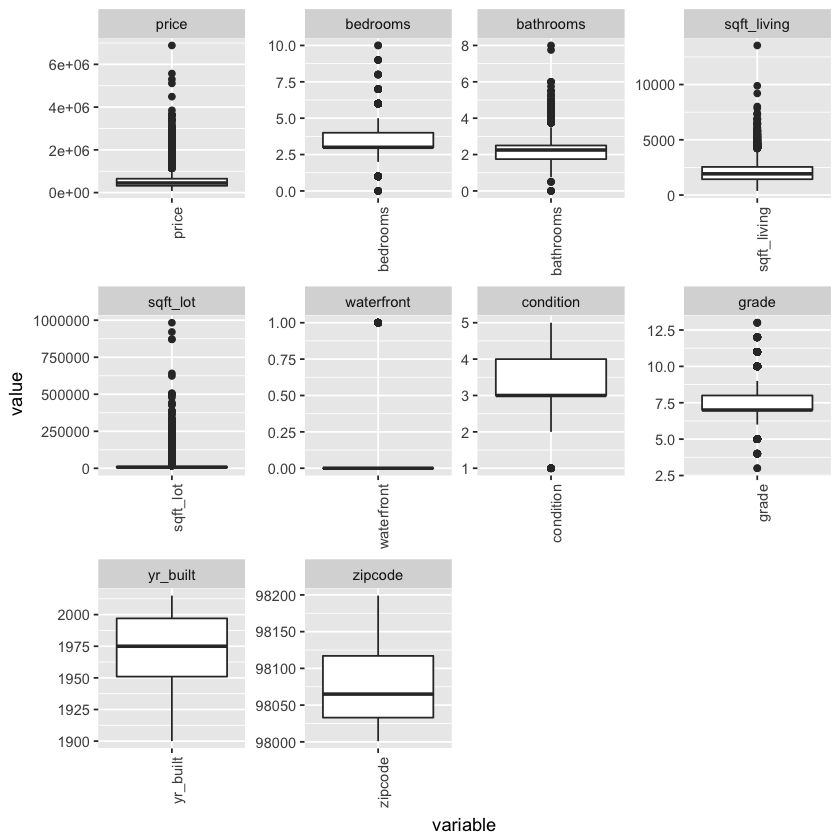

In [8]:

m1 <- melt(as.data.frame(housingdata)) ##changing the orientation for visualization
## drawing the boxplot for the individual variable
ggplot(m1,aes(x = variable,y = value)) + 
  facet_wrap(~variable, scales = 'free') + 
  geom_boxplot()+
  theme(axis.text.x = element_text(angle = 90, hjust = 1))

In [9]:
### converting nominal variables into factors
housingdata$bedrooms <- as.factor(housingdata$bedrooms)
housingdata$bathrooms <- as.factor(housingdata$bathrooms)
housingdata$waterfront <- as.factor(housingdata$waterfront)
housingdata$condition <- as.factor(housingdata$condition)
housingdata$grade <- as.factor(housingdata$grade)
#housingdata$yr_built <- as.factor(housingdata$yr_built)

In [10]:
str(housingdata)

'data.frame':	10000 obs. of  10 variables:
 $ price      : int  211000 265000 1440000 800000 1059500 750000 229000 271115 428000 1240000 ...
 $ bedrooms   : Factor w/ 11 levels "0","1","2","3",..: 5 4 4 5 6 3 4 3 4 5 ...
 $ bathrooms  : Factor w/ 26 levels "0","0.5","0.75",..: 4 10 14 14 13 4 6 6 9 14 ...
 $ sqft_living: int  2100 1530 3870 2370 3230 1620 1200 830 2600 3820 ...
 $ sqft_lot   : int  9200 6000 3819 3302 3825 6120 5000 1325 15000 13224 ...
 $ waterfront : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ condition  : Factor w/ 5 levels "1","2","3","4",..: 3 4 3 3 3 3 3 3 3 3 ...
 $ grade      : Factor w/ 11 levels "3","4","5","6",..: 5 5 9 6 7 5 4 5 7 8 ...
 $ yr_built   : int  1959 1991 2002 1926 2014 1951 1979 2005 1978 1990 ...
 $ zipcode    : int  98168 98038 98102 98103 98117 98115 98146 98136 98038 98004 ...


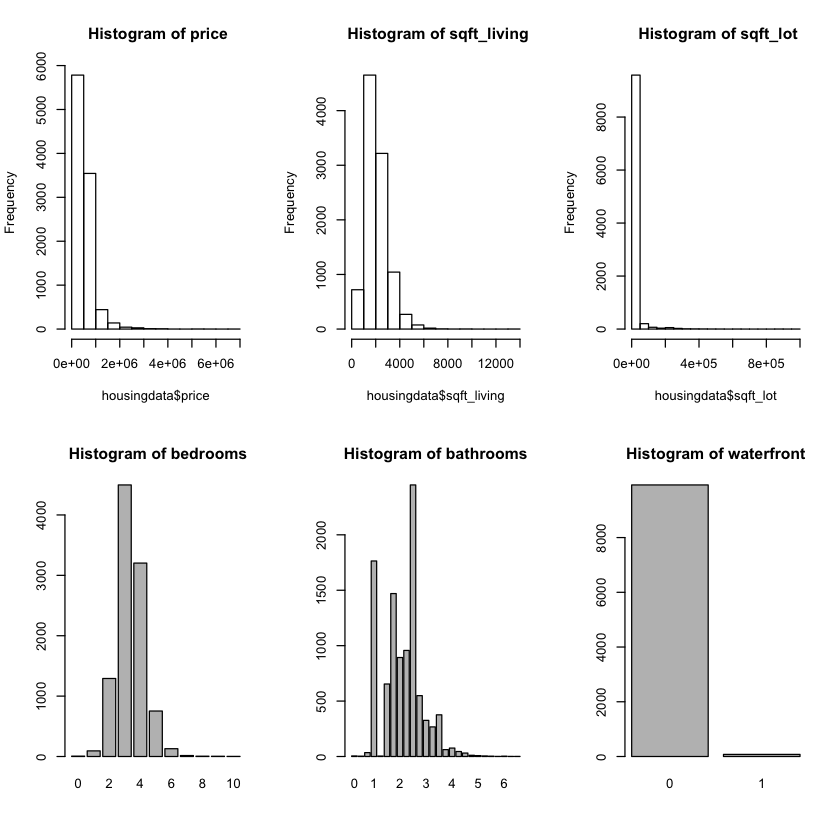

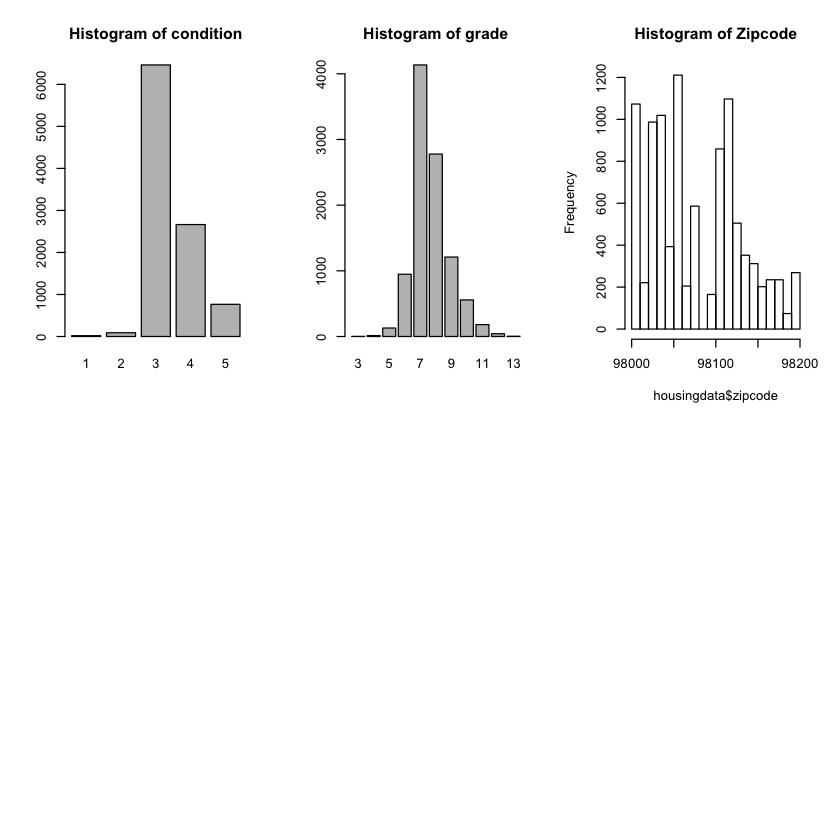

In [11]:
## plotting the histograms of the variables to check their distribution
par(mfrow = c(2,3))

hist(housingdata$price, main=" Histogram of price")
hist(housingdata$sqft_living, main=" Histogram of sqft_living")
hist(housingdata$sqft_lot, main=" Histogram of sqft_lot")
plot((housingdata$bedrooms),main=" Histogram of bedrooms") 
plot((housingdata$bathrooms),main="Histogram of bathrooms")
plot((housingdata$waterfront), main="Histogram of waterfront")
plot((housingdata$condition), main="Histogram of condition")
plot((housingdata$grade), main="Histogram of grade")
hist(housingdata$zipcode, main = "Histogram of Zipcode")
#plot(housingdata$yr_built, main = "Histogram of year Built")

##### Inference from the above graphs
* price, sqft_living , sqft_lot are right skewed

* Most of the houses have 3 bedrooms followed by 4

* Most of the houses have 2.5 bathrooms

* Most properties dont have waterfront

* Most properties have condition 3 , followed by 4

* Most houses have grade 7 or 8

* Most of the houses are built after 1950

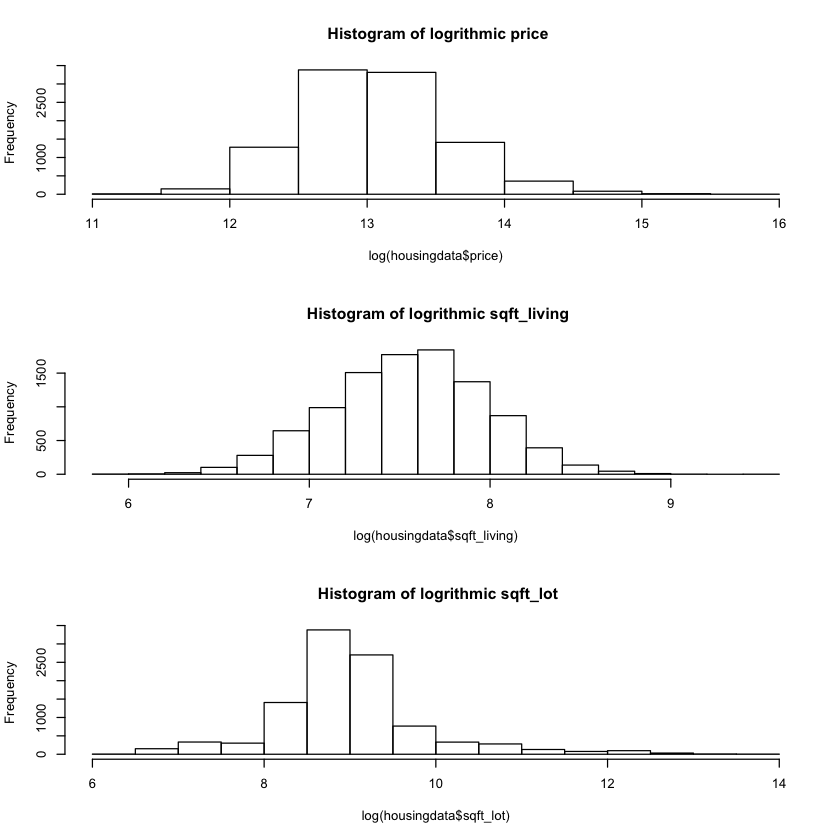

In [12]:
### plotting the skewd attributes on logrithmic scale to see the distribution
par(mfrow = c(3,1))

hist(log(housingdata$price), main=" Histogram of logrithmic price")
hist(log(housingdata$sqft_living), main=" Histogram of logrithmic sqft_living")
hist(log(housingdata$sqft_lot), main=" Histogram of logrithmic sqft_lot")

#### The logrithmic price and logrithmic sqft_living are normally distributed but the logrithmic sqft is not normally distributed.

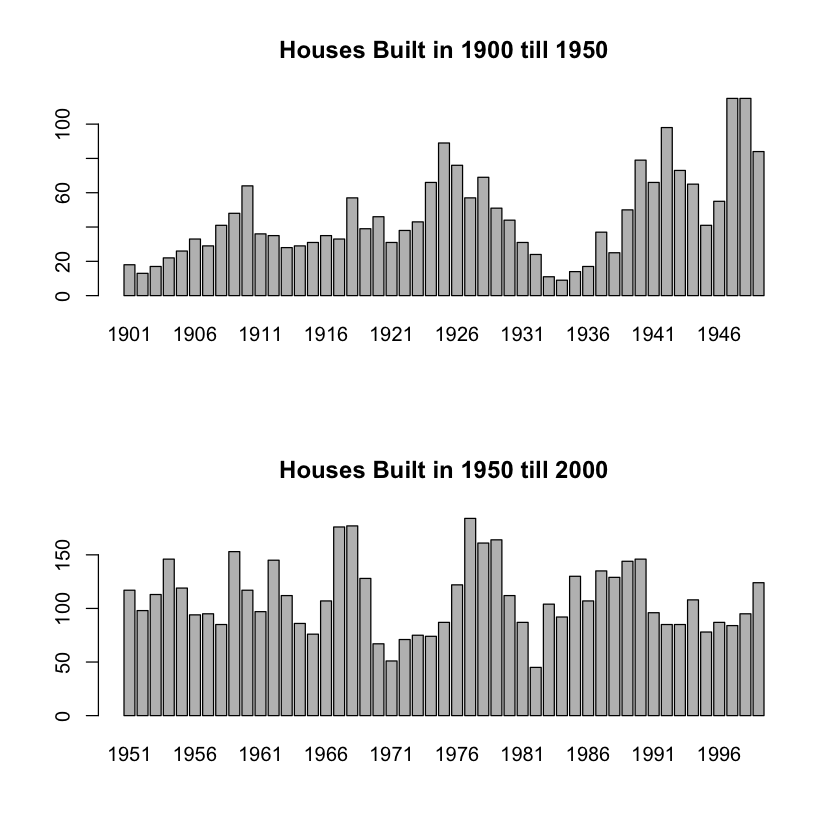

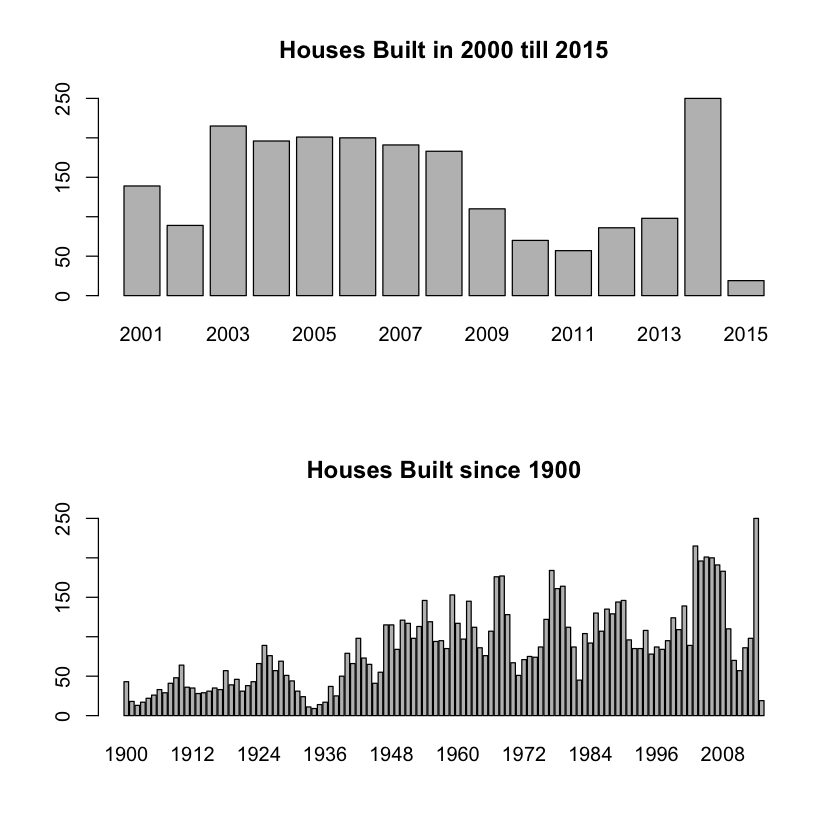

In [13]:
##checking the patterns for the house bulit year wise
par(mfrow=c(2,1))
plot(as.factor(housingdata$yr_built[housingdata$yr_built > 1900 & housingdata$yr_built < 1950]), main = "Houses Built in 1900 till 1950")
plot(as.factor(housingdata$yr_built[housingdata$yr_built > 1950 & housingdata$yr_built < 2000]), main = "Houses Built in 1950 till 2000")
plot(as.factor(housingdata$yr_built[housingdata$yr_built > 2000 & housingdata$yr_built < 2020]), main = "Houses Built in 2000 till 2015")
plot(as.factor(housingdata$yr_built), main = "Houses Built since 1900")

There has been steep decline in the sale of houses built in 1928 till 1934.

The sales of houses built in the year 1990 till 2001 has been uniform accross the years. 

## Checking the correlation between the variables

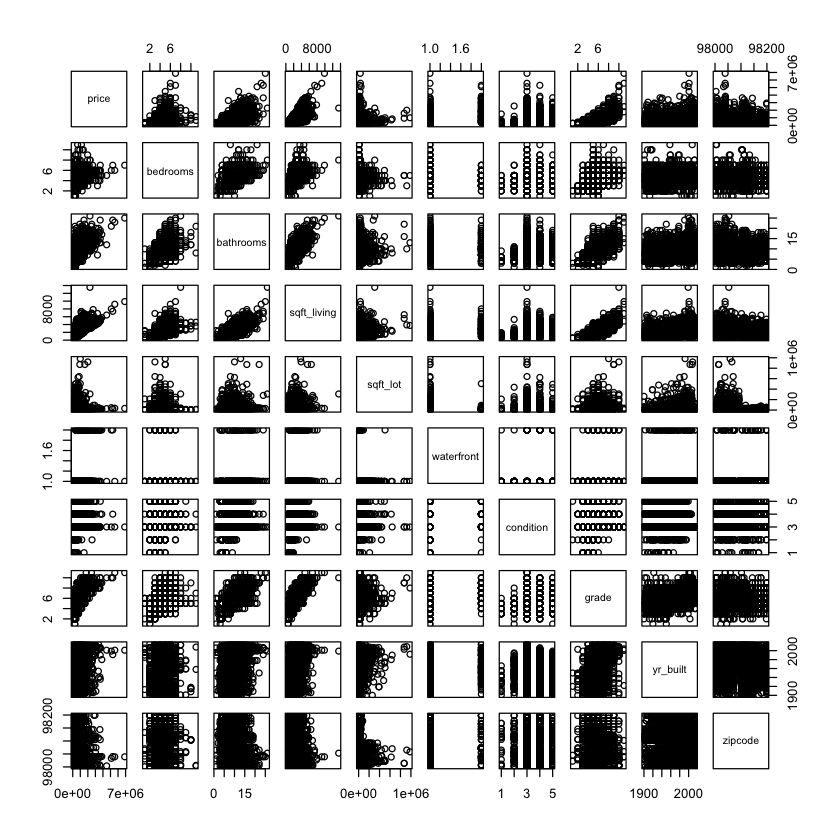

In [14]:
####Corelation between different variables
pairs(housingdata)

In [15]:
head(housingdata)

price,bedrooms,bathrooms,sqft_living,sqft_lot,waterfront,condition,grade,yr_built,zipcode
211000,4,1,2100,9200,0,3,7,1959,98168
265000,3,2.5,1530,6000,0,4,7,1991,98038
1440000,3,3.5,3870,3819,0,3,11,2002,98102
800000,4,3.5,2370,3302,0,3,8,1926,98103
1059500,5,3.25,3230,3825,0,3,9,2014,98117
750000,2,1,1620,6120,0,3,7,1951,98115


In [16]:
str(housingdata)

'data.frame':	10000 obs. of  10 variables:
 $ price      : int  211000 265000 1440000 800000 1059500 750000 229000 271115 428000 1240000 ...
 $ bedrooms   : Factor w/ 11 levels "0","1","2","3",..: 5 4 4 5 6 3 4 3 4 5 ...
 $ bathrooms  : Factor w/ 26 levels "0","0.5","0.75",..: 4 10 14 14 13 4 6 6 9 14 ...
 $ sqft_living: int  2100 1530 3870 2370 3230 1620 1200 830 2600 3820 ...
 $ sqft_lot   : int  9200 6000 3819 3302 3825 6120 5000 1325 15000 13224 ...
 $ waterfront : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ condition  : Factor w/ 5 levels "1","2","3","4",..: 3 4 3 3 3 3 3 3 3 3 ...
 $ grade      : Factor w/ 11 levels "3","4","5","6",..: 5 5 9 6 7 5 4 5 7 8 ...
 $ yr_built   : int  1959 1991 2002 1926 2014 1951 1979 2005 1978 1990 ...
 $ zipcode    : int  98168 98038 98102 98103 98117 98115 98146 98136 98038 98004 ...


In [17]:
### reading the data again for the cor matrix
data<- read.csv("training.csv")
housingdata <- data[-1]
head(housingdata)

price,bedrooms,bathrooms,sqft_living,sqft_lot,waterfront,condition,grade,yr_built,zipcode
211000,4,1.00,2100,9200,0,3,7,1959,98168
265000,3,2.50,1530,6000,0,4,7,1991,98038
1440000,3,3.50,3870,3819,0,3,11,2002,98102
800000,4,3.50,2370,3302,0,3,8,1926,98103
1059500,5,3.25,3230,3825,0,3,9,2014,98117
750000,2,1.00,1620,6120,0,3,7,1951,98115


In [18]:
cor(housingdata)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,waterfront,condition,grade,yr_built,zipcode
price,1.00000000,0.323447334,0.52504888,0.69585342,0.09395122,0.294854421,0.03339897,0.66882708,0.06104914,-0.04954038
bedrooms,0.32344733,1.000000000,0.52172634,0.59093850,0.03469110,-0.003382128,0.02869909,0.36706035,0.14510025,-0.14563153
bathrooms,0.52504888,0.521726344,1.00000000,0.75075993,0.08910870,0.075340484,-0.12710070,0.67009159,0.50991168,-0.19423624
sqft_living,0.69585342,0.590938504,0.75075993,1.00000000,0.18653177,0.119909534,-0.06341728,0.76514670,0.32163620,-0.19173193
sqft_lot,0.09395122,0.034691101,0.08910870,0.18653177,1.00000000,0.026781743,-0.01655929,0.11716693,0.05835844,-0.13529799
waterfront,0.29485442,-0.003382128,0.07534048,0.11990953,0.02678174,1.000000000,0.01523496,0.08539789,-0.01816067,0.02621444
condition,0.03339897,0.028699085,-0.12710070,-0.06341728,-0.01655929,0.015234959,1.00000000,-0.15030923,-0.36384516,0.01225731
grade,0.66882708,0.367060349,0.67009159,0.76514670,0.11716693,0.085397892,-0.15030923,1.00000000,0.45181948,-0.17988686
yr_built,0.06104914,0.145100252,0.50991168,0.32163620,0.05835844,-0.018160668,-0.36384516,0.45181948,1.00000000,-0.34942515
zipcode,-0.04954038,-0.145631531,-0.19423624,-0.19173193,-0.13529799,0.026214436,0.01225731,-0.17988686,-0.34942515,1.00000000


Looking at the above plots and the table , we can make out the following correlations:

1) Price is strongly co related with bathrooms, sqft_livings and grade and has a weaker correlation between waterfront and bedrooms.

2) bedrooms has a good correlation between bathrooms, sqft_living and a weak correlation between grade.

3) bathrooms is strongly co related with sqft_living and grade

4) condition and zipcode has a weak negative relationship between yr_built


Warning message in smoother(x, y, col = col[2], log.x = FALSE, log.y = FALSE, spread = spread, :
“could not fit smooth”Warning message in smoother(x, y, col = col[2], log.x = FALSE, log.y = FALSE, spread = spread, :
“could not fit smooth”Warning message in smoother(x, y, col = col[2], log.x = FALSE, log.y = FALSE, spread = spread, :
“could not fit smooth”Warning message in smoother(x, y, col = col[2], log.x = FALSE, log.y = FALSE, spread = spread, :
“could not fit smooth”Warning message in smoother(x, y, col = col[2], log.x = FALSE, log.y = FALSE, spread = spread, :
“could not fit smooth”Warning message in smoother(x, y, col = col[2], log.x = FALSE, log.y = FALSE, spread = spread, :
“could not fit smooth”Warning message in smoother(x, y, col = col[2], log.x = FALSE, log.y = FALSE, spread = spread, :
“could not fit smooth”Warning message in smoother(x, y, col = col[2], log.x = FALSE, log.y = FALSE, spread = spread, :
“could not fit smooth”Warning message in smoother(x, y, col = col[2], 

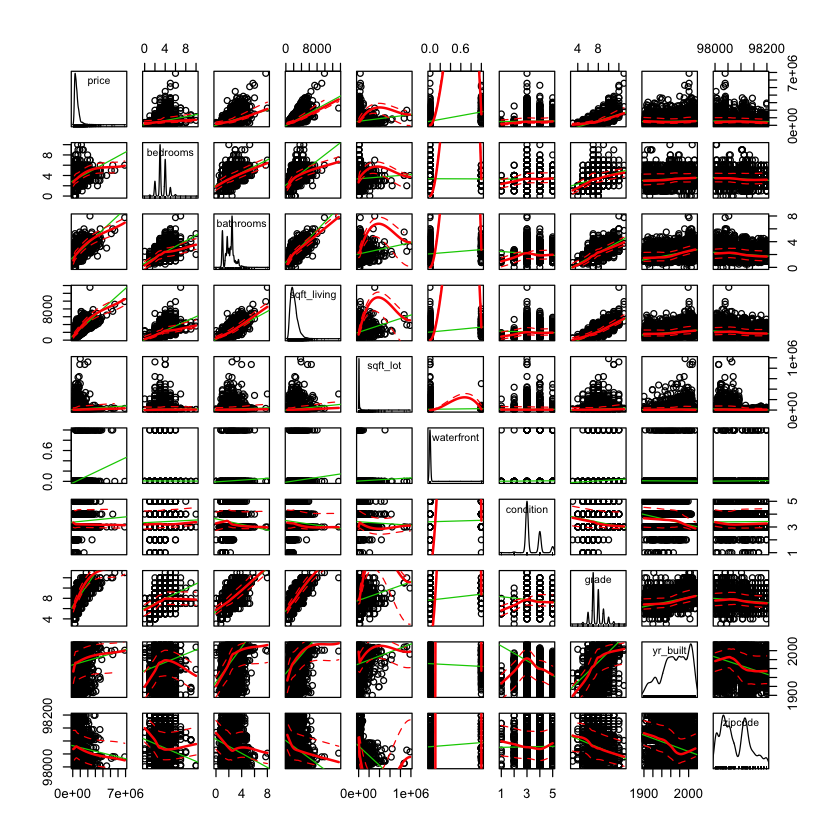

In [19]:
###looking deep into the co relation of the varibles using the scatter plot matrix
#library(car)
scatterplotMatrix(housingdata)

From the above scatterplot matrix we can see that almost all of the correlation are non linear.

In [20]:
### converting the variables to factors for checking their relationships with other variables
housingdata$grade <- as.factor(housingdata$grade)
housingdata$waterfront <- as.factor(housingdata$waterfront)
housingdata$zipcode <- as.factor(housingdata$zipcode)
housingdata$condition <- as.factor(housingdata$condition)
m1 <- melt(as.data.frame(housingdata))
#m1 <- m1[!(m1$variable == "zipcode"),]

Using waterfront, condition, grade, zipcode as id variables


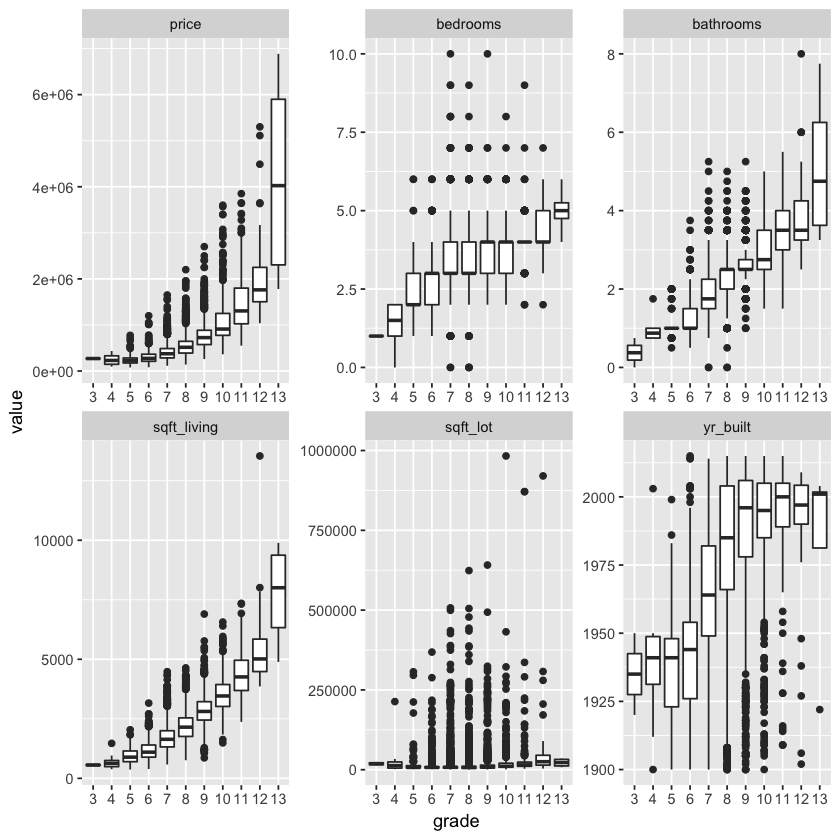

In [21]:
#checking the dependencies of grade with other variables
ggplot(m1,aes(x=grade, y = value)) + 
    geom_boxplot() +
    facet_wrap(~variable, scales = "free") 

Higher the grade of the house is, higher the median price is and as the grade goes up the uncertinity in the price factor also increases.

Higher grade houses have more number of bathrooms.

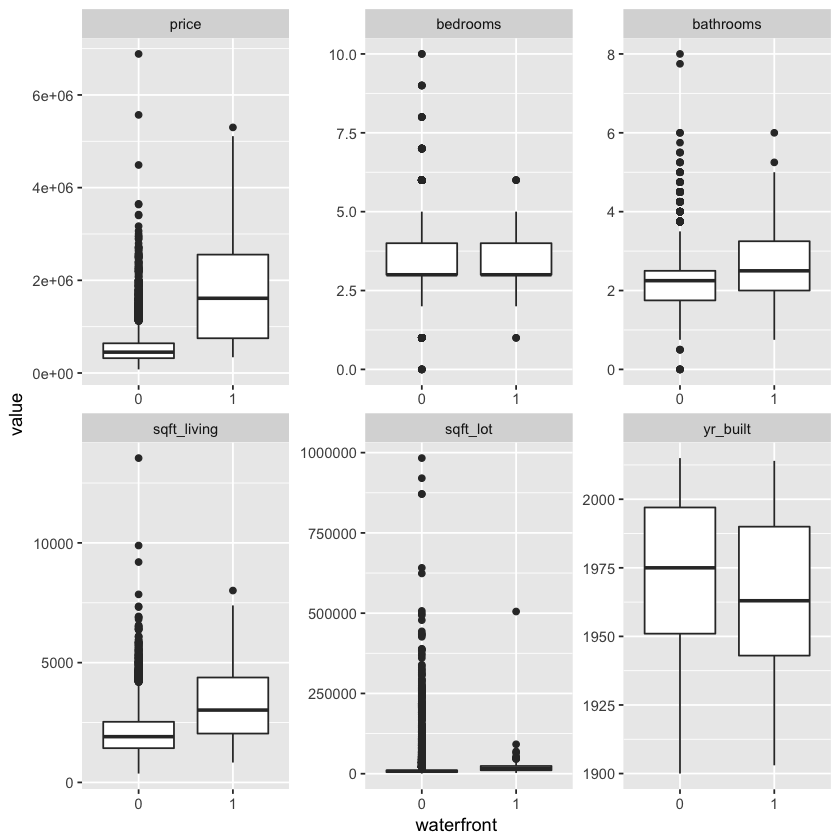

In [22]:
#Checking the dependencies of waterfront with other variables
ggplot(m1,aes(x=waterfront, y = value)) + 
    geom_boxplot() +
    facet_wrap(~variable, scales = "free") 

Since most of the properties are non waterfront, so everything is skewed towards non waterfront. There is not much information from the above graphs, we will try using the density graph in the next step

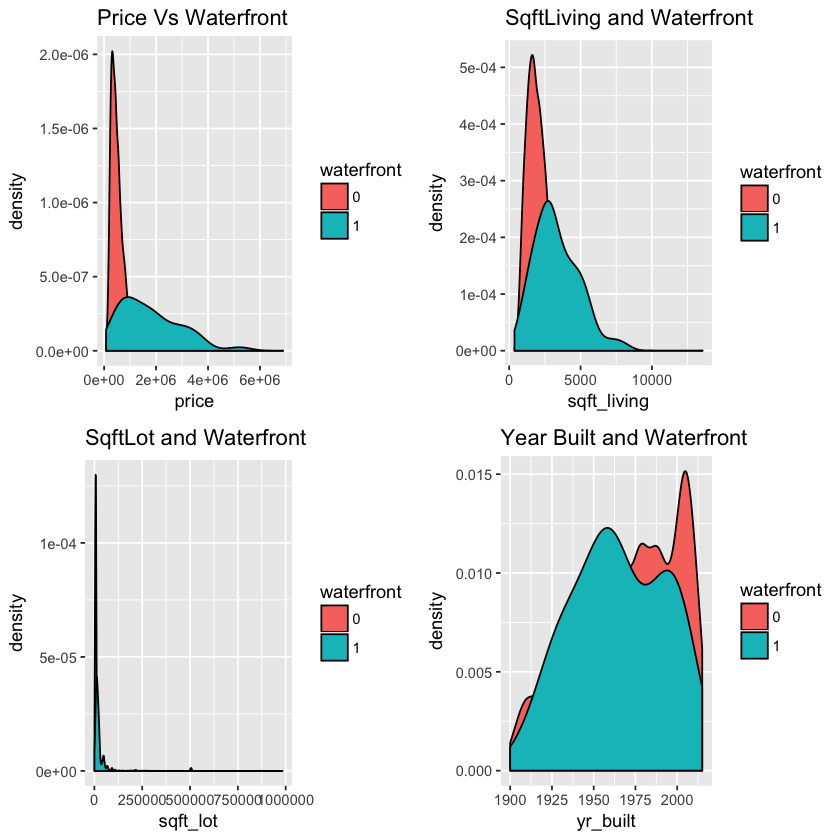

In [23]:
p1 <- ggplot(aes(x=price),data = housingdata) + ggtitle('Price Vs Waterfront') +
    geom_density(aes(fill = waterfront)) 
 p2 <- ggplot(aes(x=sqft_living),data = housingdata) + geom_density(aes(fill = waterfront)) +
    ggtitle('SqftLiving and Waterfront') 
p3 <- ggplot(aes(x=sqft_lot),data = housingdata) + geom_density(aes(fill = waterfront)) +
    ggtitle('SqftLot and Waterfront') 
p4 <-ggplot(aes(x=yr_built),data = housingdata) + geom_density(aes(fill = waterfront)) +
    ggtitle('Year Built and Waterfront')

grid.arrange(p1, p2, p3, p4, ncol = 2)

#### Observations from the above graphs

* Houses with waterfront have a wide price range 
* Houses with waterfront have a wide range of sqft_living.
* Houses with waterfront are built earlier than non-waterfront houses.

Lets check the sqft_lot and waterfront are related

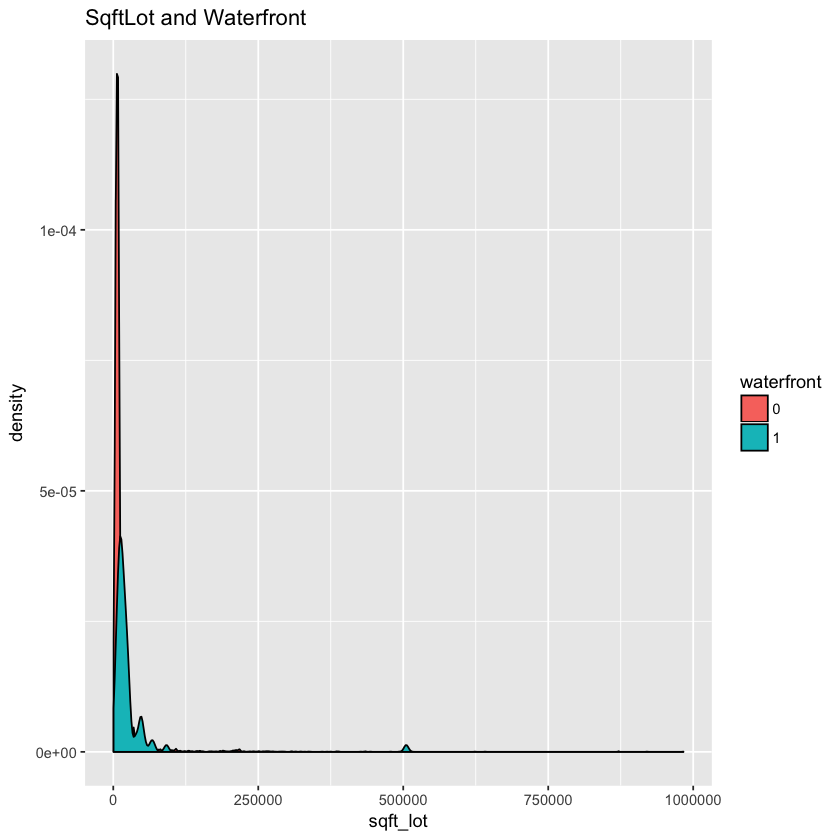

In [24]:
ggplot(aes(x=sqft_lot),data = housingdata) + geom_density(aes(fill = waterfront)) +
    ggtitle('SqftLot and Waterfront') 

Observation from the above graph

* Waterfront properties usually have more area.

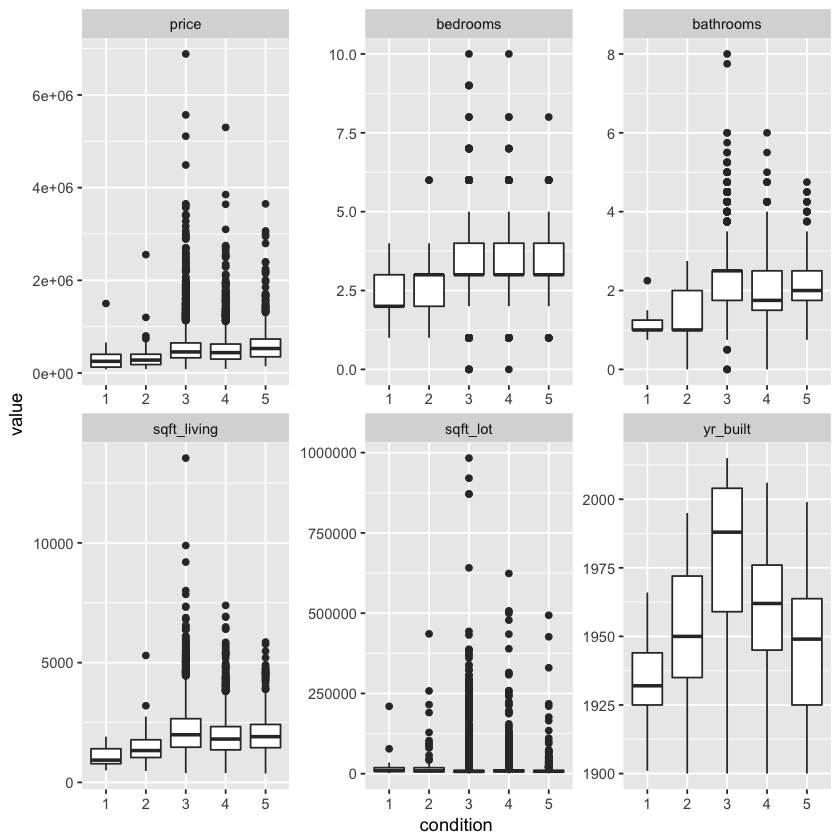

In [25]:
#Checking the dependencies of conditions with
ggplot(m1,aes(x=condition, y = value)) + 
    geom_boxplot() +
    facet_wrap(~variable, scales = "free") 

From the above plots , there seem not any good correlation between the prices and the condition, all seems to have the same price.

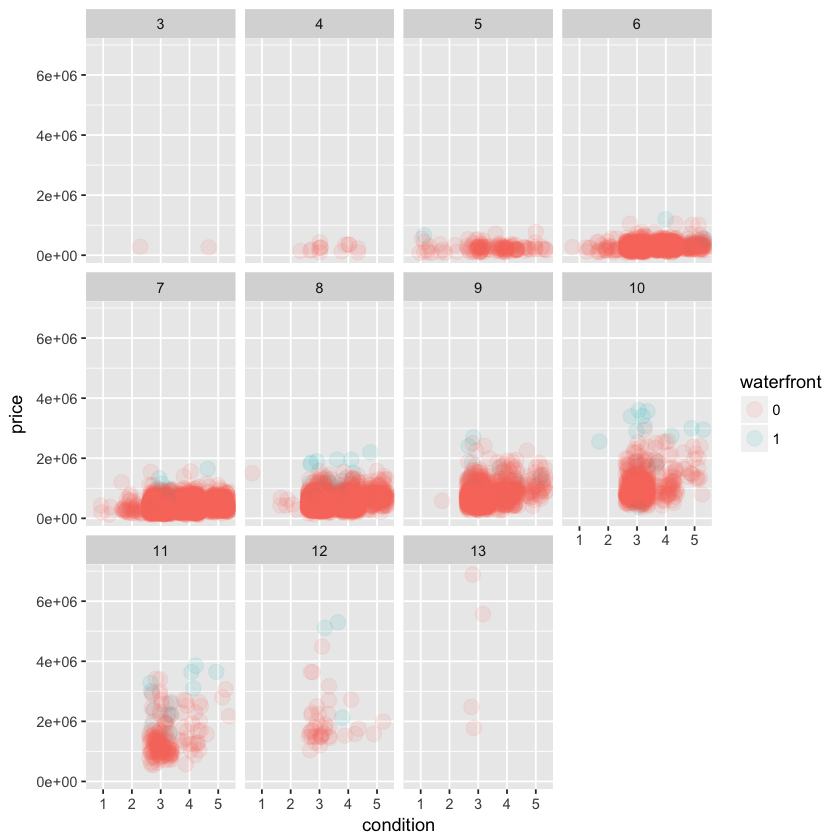

In [26]:
## plotting the price vs water front and non waterfront properties based on condition for differnt grades
ggplot(aes(x=condition, y=price),data = housingdata) + 
    geom_jitter(aes(color = waterfront, bg = waterfront), alpha=1/10,,pch=21, cex=4) +
    facet_wrap(~grade) #+
    #scale_color_brewer(type = 'div') 

 From the above plot , we can see that most of the waterfront properties have condition 3

In [27]:
uniq_zipcodes <- unique(housingdata$zipcode)

In [28]:
uniq_zipcodes

[1] 98168 98038 98102 98103 98117 98115 98146 98136 98004 98199 98126 98112
[13] 98070 98188 98056 98052 98042 98032 98031 98065 98074 98092 98006 98014
[25] 98034 98001 98133 98022 98058 98116 98059 98198 98033 98118 98125 98122
[37] 98177 98029 98178 98007 98040 98053 98144 98008 98119 98055 98030 98045
[49] 98108 98075 98010 98077 98027 98106 98155 98019 98023 98003 98166 98028
[61] 98011 98105 98107 98072 98039 98002 98024 98005 98148 98109
70 Levels: 98001 98002 98003 98004 98005 98006 98007 98008 98010 ... 98199

In [29]:
library(dplyr)

geom_path: Each group consists of only one observation. Do you need to adjust
the group aesthetic?


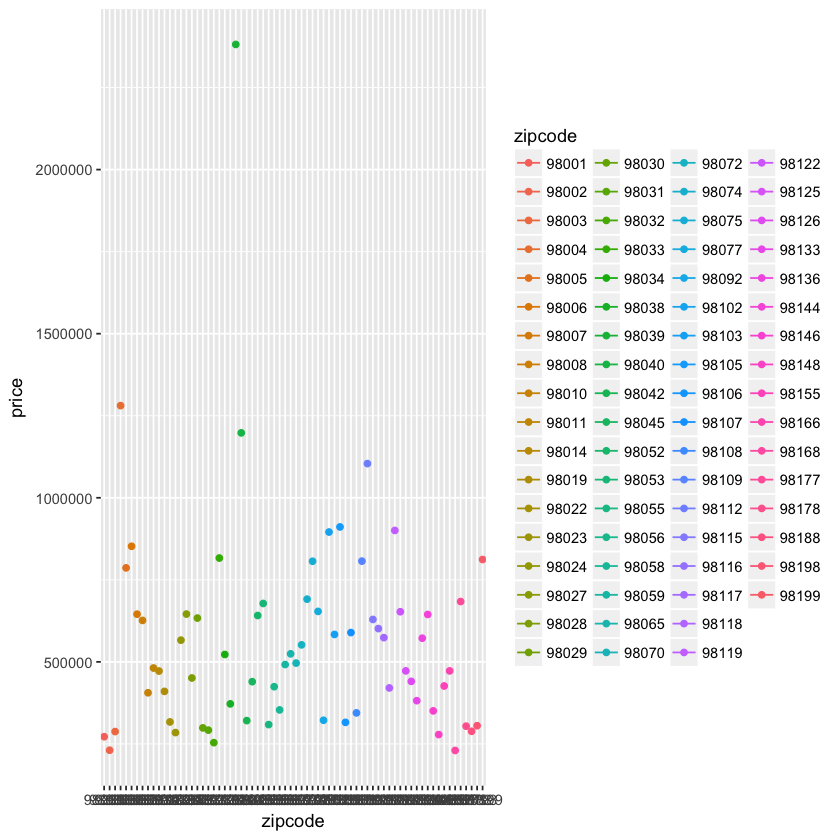

In [30]:
avg_zip_price<-housingdata%>%select(zipcode,price)%>%group_by(zipcode)%>%summarise(price = round(mean(price),0))
ggplot(data=avg_zip_price,aes(x=zipcode, y=price, colour=zipcode)) + 
      geom_point()+geom_line()

From the above we can see that the 98039 is the expensive zipcode 

##  Task 2 Building the linear regression model

In [31]:
#reading the data again for the regression model
housingdata <- read.csv("training.csv")
housingdata <- housingdata[-1]

In [32]:
#converting the variables to factors
housingdata$grade <- as.factor(housingdata$grade)
housingdata$waterfront <- as.factor(housingdata$waterfront)
housingdata$zipcode <- as.factor(housingdata$zipcode)
housingdata$condition <- as.factor(housingdata$condition)

In [33]:
my_fit = lm(price~., data = housingdata)

In [34]:
summary(my_fit)


Call:
lm(formula = price ~ ., data = housingdata)

Residuals:
     Min       1Q   Median       3Q      Max 
-1247108   -65534      265    55635  1899005 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)   1.431e+06  2.003e+05   7.143 9.75e-13 ***
bedrooms     -1.144e+04  2.288e+03  -5.001 5.79e-07 ***
bathrooms     2.518e+04  3.634e+03   6.930 4.47e-12 ***
sqft_living   1.470e+02  3.681e+00  39.946  < 2e-16 ***
sqft_lot      2.178e-01  4.453e-02   4.890 1.02e-06 ***
waterfront1   8.853e+05  1.834e+04  48.260  < 2e-16 ***
condition2    6.572e+04  3.958e+04   1.660 0.096860 .  
condition3    7.826e+04  3.626e+04   2.158 0.030926 *  
condition4    1.022e+05  3.627e+04   2.818 0.004840 ** 
condition5    1.365e+05  3.659e+04   3.730 0.000192 ***
grade4       -8.206e+04  1.171e+05  -0.700 0.483632    
grade5       -1.220e+05  1.105e+05  -1.104 0.269618    
grade6       -1.240e+05  1.098e+05  -1.130 0.258690    
grade7       -1.140e+05  1.098e+05  -1.038 0.2

#### the model has F static of 532 and  adjusted R squared value of 0.8255 i.e approx 83% of the variation in prices is explained by this model. The f statistic has a p value < 2.2e-16 , which explains that the model is useful.

The F static value is 532.6

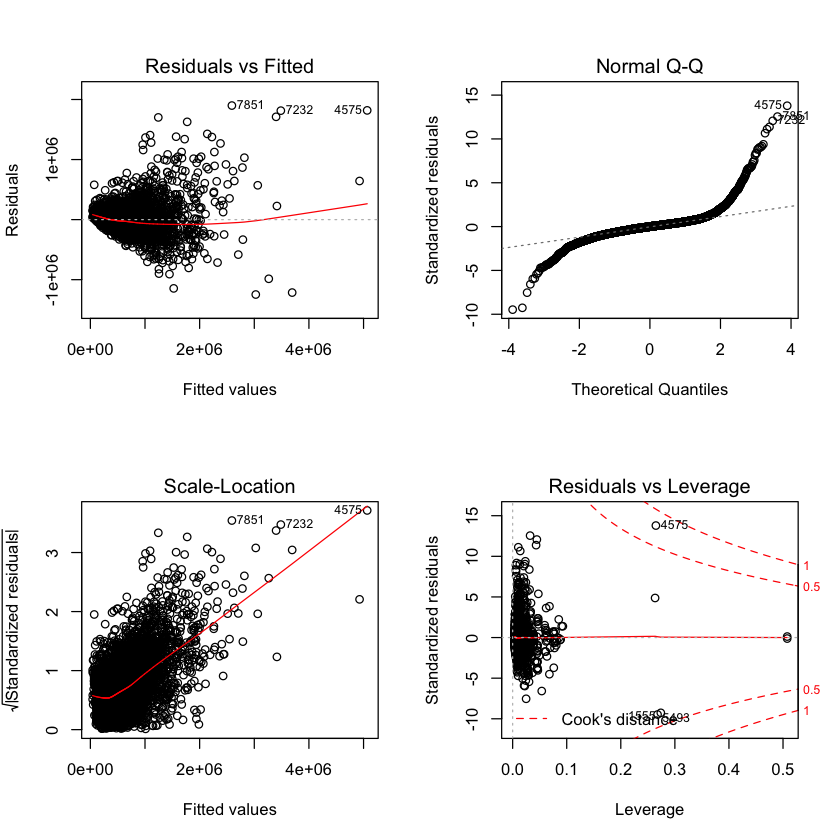

In [35]:
#Ploting the model plots of the linear model
par(mfrow=c(2,2))
plot(my_fit)

The model plots show:
- Residual vs Fitted - showa the residuals are evenly distributed around the zero line
- Normal Q-Q - shows the residuals doesnot follow the normal distribution
- Scale-Location - shoes the model  doesnot follow the assumption of equal variance
- Residuals vs Leverage - shows there ca be possible outliers

In [36]:
step(my_fit)

Start:  AIC=238963.1
price ~ bedrooms + bathrooms + sqft_living + sqft_lot + waterfront + 
    condition + grade + yr_built + zipcode

              Df  Sum of Sq        RSS    AIC
<none>                      2.3454e+14 238963
- sqft_lot     1 5.6604e+11 2.3511e+14 238985
- bedrooms     1 5.9200e+11 2.3513e+14 238986
- bathrooms    1 1.1366e+12 2.3568e+14 239009
- yr_built     1 1.7687e+12 2.3631e+14 239036
- condition    4 2.5188e+12 2.3706e+14 239062
- sqft_living  1 3.7765e+13 2.7231e+14 240454
- waterfront   1 5.5121e+13 2.8966e+14 241072
- grade       10 6.3988e+13 2.9853e+14 241355
- zipcode     69 2.0542e+14 4.3996e+14 245116



Call:
lm(formula = price ~ bedrooms + bathrooms + sqft_living + sqft_lot + 
    waterfront + condition + grade + yr_built + zipcode, data = housingdata)

Coefficients:
 (Intercept)      bedrooms     bathrooms   sqft_living      sqft_lot  
   1.431e+06    -1.144e+04     2.518e+04     1.470e+02     2.178e-01  
 waterfront1    condition2    condition3    condition4    condition5  
   8.853e+05     6.572e+04     7.826e+04     1.022e+05     1.365e+05  
      grade4        grade5        grade6        grade7        grade8  
  -8.206e+04    -1.220e+05    -1.240e+05    -1.140e+05    -7.400e+04  
      grade9       grade10       grade11       grade12       grade13  
   2.521e+04     1.721e+05     4.050e+05     8.199e+05     2.138e+06  
    yr_built  zipcode98002  zipcode98003  zipcode98004  zipcode98005  
  -7.282e+02     7.901e+03    -1.158e+03     7.371e+05     2.781e+05  
zipcode98006  zipcode98007  zipcode98008  zipcode98010  zipcode98011  
   2.662e+05     2.425e+05     2.636e+05     5.397

###### The step function has not removed any of the variables

Since in the EDA part we have seen that the 3 variables i.e price, sqft_living and sqft_lot are skewed, we will take the log of these and use in the next model.

In [37]:
my_fit1 <- lm(log(price)~. + log(sqft_living) + log(sqft_lot), data = housingdata)
summary(my_fit1)


Call:
lm(formula = log(price) ~ . + log(sqft_living) + log(sqft_lot), 
    data = housingdata)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.04649 -0.10225  0.00246  0.10389  1.12309 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)       1.032e+01  2.959e-01  34.880  < 2e-16 ***
bedrooms         -1.755e-02  2.859e-03  -6.138 8.69e-10 ***
bathrooms         3.764e-02  4.508e-03   8.350  < 2e-16 ***
sqft_living       5.551e-05  9.325e-06   5.953 2.73e-09 ***
sqft_lot         -2.897e-08  7.268e-08  -0.399 0.690195    
waterfront1       6.557e-01  2.247e-02  29.176  < 2e-16 ***
condition2        1.089e-01  4.844e-02   2.247 0.024637 *  
condition3        2.689e-01  4.439e-02   6.057 1.43e-09 ***
condition4        2.991e-01  4.440e-02   6.736 1.71e-11 ***
condition5        3.608e-01  4.480e-02   8.052 9.06e-16 ***
grade4           -4.699e-01  1.434e-01  -3.277 0.001051 ** 
grade5           -5.052e-01  1.353e-01  -3.734 0.000190 ***
grade

The new model has F static as 766 and adjusted R squared value of 87.44% with p value < 2.2e-16, which is better than my_fit1, so the log transformation helps., but the sqft_lot has a higher p value, lets remove it 

In [38]:
my_fit2<- lm(log(price) ~ bedrooms + bathrooms + sqft_living + 
    waterfront + condition + grade + yr_built + zipcode + log(sqft_living) + 
    log(sqft_lot), data = housingdata)

In [39]:
summary(my_fit2)


Call:
lm(formula = log(price) ~ bedrooms + bathrooms + sqft_living + 
    waterfront + condition + grade + yr_built + zipcode + log(sqft_living) + 
    log(sqft_lot), data = housingdata)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.04636 -0.10217  0.00259  0.10392  1.12291 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)       1.034e+01  2.908e-01  35.565  < 2e-16 ***
bedrooms         -1.748e-02  2.853e-03  -6.125 9.41e-10 ***
bathrooms         3.751e-02  4.495e-03   8.344  < 2e-16 ***
sqft_living       5.535e-05  9.316e-06   5.941 2.92e-09 ***
waterfront1       6.560e-01  2.246e-02  29.205  < 2e-16 ***
condition2        1.088e-01  4.843e-02   2.247 0.024640 *  
condition3        2.688e-01  4.439e-02   6.056 1.44e-09 ***
condition4        2.991e-01  4.440e-02   6.737 1.71e-11 ***
condition5        3.607e-01  4.480e-02   8.052 9.11e-16 ***
grade4           -4.708e-01  1.433e-01  -3.284 0.001026 ** 
grade5           -5.062e-01  1.35

#### After removing the sqft_lot , the new model has a better f static and R squared value remains same

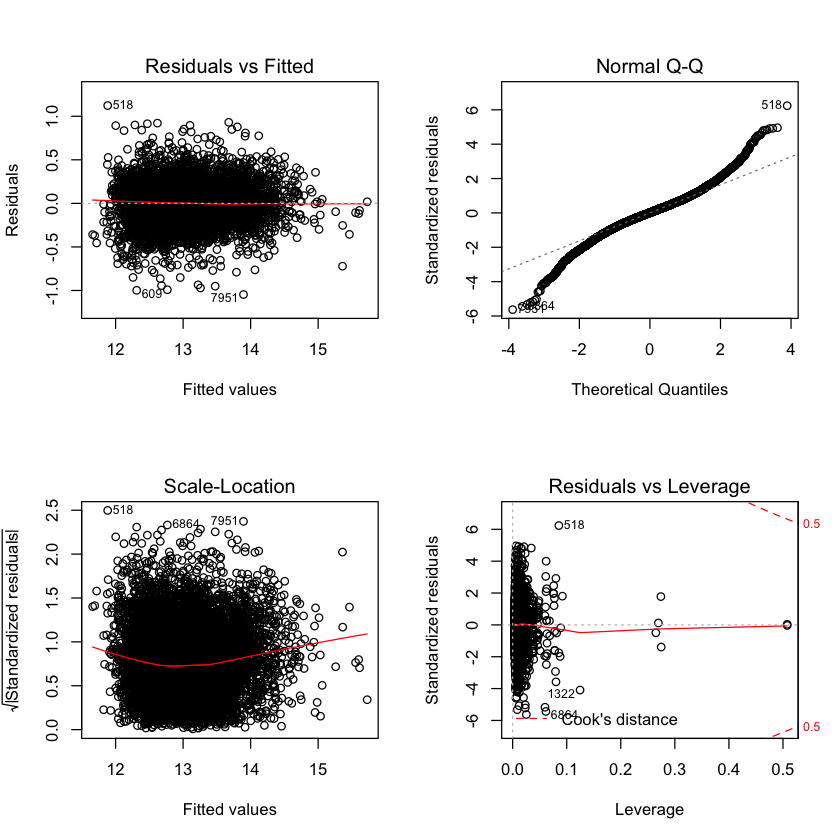

In [40]:
par(mfrow=c(2,2))
plot(my_fit2)

The model plots show:
- Residual vs Fitted - shows the residuals are evenly distributed around the zero line
- Normal Q-Q - shows the residuals doesnot follow the normal distribution
- Scale-Location - the plot has improved from the previous model
- Residuals vs Leverage - the effect of outliers has been reduced.

#### Using interactions variables for those who have a good corelation coefficient. Adding the interactions of the variables which has correlation coefficient of 0.6 and greater and adding the negative co relation values in the fit

In [41]:
my_fit3 <- lm(formula = log(price) ~ bedrooms + bathrooms + sqft_living + 
    waterfront + condition + grade + yr_built + zipcode + log(sqft_living) + 
    log(sqft_lot) + bathrooms:sqft_living + bathrooms:grade + sqft_living:bedrooms + 
               sqft_living:grade + yr_built:condition , data = housingdata)

In [42]:
summary(my_fit3)


Call:
lm(formula = log(price) ~ bedrooms + bathrooms + sqft_living + 
    waterfront + condition + grade + yr_built + zipcode + log(sqft_living) + 
    log(sqft_lot) + bathrooms:sqft_living + bathrooms:grade + 
    sqft_living:bedrooms + sqft_living:grade + yr_built:condition, 
    data = housingdata)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.02251 -0.09798  0.00307  0.10183  1.13452 

Coefficients: (1 not defined because of singularities)
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)           -4.499e+00  4.902e+00  -0.918 0.358755    
bedrooms              -6.545e-03  7.316e-03  -0.895 0.371025    
bathrooms             -9.533e-03  3.545e-01  -0.027 0.978547    
sqft_living           -2.079e-04  1.323e-04  -1.572 0.116010    
waterfront1            6.630e-01  2.234e-02  29.677  < 2e-16 ***
condition2             1.191e+01  5.156e+00   2.310 0.020925 *  
condition3             1.298e+01  4.893e+00   2.654 0.007975 ** 
condition4      

The model has f static of 621 and adjusted R squared value of 87.7%.

Bathrooms: grade interaction has a greater p value. we will remove it in the next model.

Removing the batroom : grade interaction in the next step.

In [43]:
my_fit4 <- lm(formula = log(price) ~ bedrooms + bathrooms + sqft_living + 
    waterfront + condition + grade + yr_built + zipcode + log(sqft_living) + 
    log(sqft_lot) + bathrooms:sqft_living  + sqft_living:bedrooms + 
               sqft_living:grade + yr_built:condition , data = housingdata)

In [44]:
summary(my_fit4)


Call:
lm(formula = log(price) ~ bedrooms + bathrooms + sqft_living + 
    waterfront + condition + grade + yr_built + zipcode + log(sqft_living) + 
    log(sqft_lot) + bathrooms:sqft_living + sqft_living:bedrooms + 
    sqft_living:grade + yr_built:condition, data = housingdata)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.02208 -0.09918  0.00210  0.10181  1.13233 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)           -4.815e+00  5.236e+00  -0.920 0.357762    
bedrooms              -6.523e-03  7.296e-03  -0.894 0.371293    
bathrooms              1.807e-02  9.516e-03   1.899 0.057567 .  
sqft_living            1.212e-04  3.325e-03   0.036 0.970918    
waterfront1            6.640e-01  2.232e-02  29.752  < 2e-16 ***
condition2             1.208e+01  5.157e+00   2.343 0.019167 *  
condition3             1.329e+01  4.893e+00   2.717 0.006599 ** 
condition4             1.631e+01  4.897e+00   3.330 0.000873 ***
condition5     

The f static has increased to 672.4 and R squared value remains almost same. In the summary of the above model, we can see that the p value of the interaction sqft_living:grade is very high so we will remove it in the next step and see how the model behaves.

#### Removing the sqft_living: grade interaction

In [45]:
my_fit5 <- lm(formula = log(price) ~ bedrooms + bathrooms + sqft_living + 
    waterfront + condition + grade + yr_built + zipcode + log(sqft_living) + 
    log(sqft_lot) + bathrooms:sqft_living  + sqft_living:bedrooms + 
                yr_built:condition , data = housingdata)

In [46]:
summary(my_fit5)


Call:
lm(formula = log(price) ~ bedrooms + bathrooms + sqft_living + 
    waterfront + condition + grade + yr_built + zipcode + log(sqft_living) + 
    log(sqft_lot) + bathrooms:sqft_living + sqft_living:bedrooms + 
    yr_built:condition, data = housingdata)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.04518 -0.10105  0.00212  0.10373  1.13687 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)           -2.847e+00  4.921e+00  -0.579 0.562879    
bedrooms              -1.906e-03  7.224e-03  -0.264 0.791873    
bathrooms              3.752e-02  8.169e-03   4.593 4.42e-06 ***
sqft_living            1.017e-04  2.354e-05   4.320 1.58e-05 ***
waterfront1            6.587e-01  2.242e-02  29.381  < 2e-16 ***
condition2             1.186e+01  5.186e+00   2.287 0.022194 *  
condition3             1.296e+01  4.919e+00   2.635 0.008425 ** 
condition4             1.590e+01  4.924e+00   3.229 0.001248 ** 
condition5             1.554e+01  4

Removing the interaction decreases the adjusted R squared value but increases the F static. We will calculate the RMSE for the test data, using my_fit4 and my_fit5 to check which has got lesser value of RMSE and accordingly select that model for prediction.

In [47]:
str(housingdata)

'data.frame':	10000 obs. of  10 variables:
 $ price      : int  211000 265000 1440000 800000 1059500 750000 229000 271115 428000 1240000 ...
 $ bedrooms   : int  4 3 3 4 5 2 3 2 3 4 ...
 $ bathrooms  : num  1 2.5 3.5 3.5 3.25 1 1.5 1.5 2.25 3.5 ...
 $ sqft_living: int  2100 1530 3870 2370 3230 1620 1200 830 2600 3820 ...
 $ sqft_lot   : int  9200 6000 3819 3302 3825 6120 5000 1325 15000 13224 ...
 $ waterfront : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ condition  : Factor w/ 5 levels "1","2","3","4",..: 3 4 3 3 3 3 3 3 3 3 ...
 $ grade      : Factor w/ 11 levels "3","4","5","6",..: 5 5 9 6 7 5 4 5 7 8 ...
 $ yr_built   : int  1959 1991 2002 1926 2014 1951 1979 2005 1978 1990 ...
 $ zipcode    : Factor w/ 70 levels "98001","98002",..: 65 24 42 43 52 50 61 59 24 4 ...


### Prediction

In [48]:
test <- read.csv("dev.csv") ### loading the test data

In [49]:
#### removing the id and price column from the test data
test<-test[-1]
pred_data <- test[-1]

In [50]:
head(pred_data)

bedrooms,bathrooms,sqft_living,sqft_lot,waterfront,condition,grade,yr_built,zipcode
4,3.50,4210,10308,0,3,10,2006,98008
3,1.75,2150,4200,0,5,8,1960,98116
4,2.00,3380,90968,0,4,9,1979,98075
4,2.50,2790,230868,0,3,8,1989,98077
2,1.00,960,28717,0,4,6,1984,98070
4,2.50,1560,4350,0,3,7,2003,98056


In [51]:
#preparing the data
pred_data$grade[pred_data$grade < 3] <- 3 # if any grades are present other than the present in training data, the model will give errors

pred_data$grade <- as.factor(pred_data$grade)
pred_data$waterfront <- as.factor(pred_data$waterfront)
pred_data$zipcode <- as.factor(pred_data$zipcode)
pred_data$condition <- as.factor(pred_data$condition)



#### Predicitng the house price of the dev data

In [52]:
pred_my_fit4 <- predict(my_fit4,pred_data)
pred_my_fit5 <- predict(my_fit5,pred_data)

In [53]:
target_my_fit4 <- as.data.frame(cbind(test['price'],exp(pred_my_fit4))) # using exp function to take the exponential of the predicted price as our model predicts log(price)
target_my_fit5 <- as.data.frame(cbind(test['price'],exp(pred_my_fit5)))

In [54]:
#min_max_accuracy <- mean(apply(a, 1, min) / apply(a, 1, max)) 

In [55]:
#min_max_accuracy

In [56]:
###RMSE for model my_fit4
RMSE_my_fit4 <- sqrt(sum((test['price'] - exp(pred_my_fit4))^2)/nrow(test))
RMSE_my_fit4

[1] 124529.3

In [57]:
###RMSE for model my_fit5
RMSE_my_fit5 <- sqrt(sum((test['price'] - exp(pred_my_fit5))^2)/nrow(test))
RMSE_my_fit5

[1] 126329.2

#### Since the RMSE for the model my_fit4 is lesser than that of my_fit5, we can conclude that the my_fit4 is our final model.

In [58]:
final_model <- my_fit4

In [59]:
summary(final_model)


Call:
lm(formula = log(price) ~ bedrooms + bathrooms + sqft_living + 
    waterfront + condition + grade + yr_built + zipcode + log(sqft_living) + 
    log(sqft_lot) + bathrooms:sqft_living + sqft_living:bedrooms + 
    sqft_living:grade + yr_built:condition, data = housingdata)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.02208 -0.09918  0.00210  0.10181  1.13233 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)           -4.815e+00  5.236e+00  -0.920 0.357762    
bedrooms              -6.523e-03  7.296e-03  -0.894 0.371293    
bathrooms              1.807e-02  9.516e-03   1.899 0.057567 .  
sqft_living            1.212e-04  3.325e-03   0.036 0.970918    
waterfront1            6.640e-01  2.232e-02  29.752  < 2e-16 ***
condition2             1.208e+01  5.157e+00   2.343 0.019167 *  
condition3             1.329e+01  4.893e+00   2.717 0.006599 ** 
condition4             1.631e+01  4.897e+00   3.330 0.000873 ***
condition5     

#### Summary of our final model

* Residuals: They are evenly distributed around zero with 1Q and 3Q equally distanced from zero.

* Coefficients: All the coefficients have small p value, so all these variables are required in the model

* Residual standard error: RSE is 0.1865 which is closer to zero.

* R squared : Adjusted R squared value of the model is .8768 i.e 87.68% variation in the log of the price is explained by the model.

* F static: F stat value is 672.4 which shows a healthy relationship between predictor n predictee and even the p value is small i.e the model is useful.

In [60]:
#lets check for potential outlier
# Check the records in the warnings
outlierTest(final_model, cutoff=0.05, digits = 1)

      rstudent unadjusted p-value Bonferonni p
518   6.363836         2.0550e-10   2.0545e-06
7951 -5.520642         3.4629e-08   3.4623e-04
609  -5.515271         3.5701e-08   3.5694e-04
2716 -5.388253         7.2780e-08   7.2765e-04
4114 -5.199477         2.0384e-07   2.0380e-03
1650 -5.187817         2.1699e-07   2.1694e-03
2091  4.935804         8.1124e-07   8.1108e-03
2409  4.932948         8.2316e-07   8.2300e-03
9542  4.854803         1.2235e-06   1.2233e-02
1642  4.830515         1.3822e-06   1.3820e-02

,StudRes,Hat,CookD
518,6.363836,0.08574209,0.03535486
1322,-1.880552,0.65989997,0.06411311
6061,NaN,1.00000000,NaN


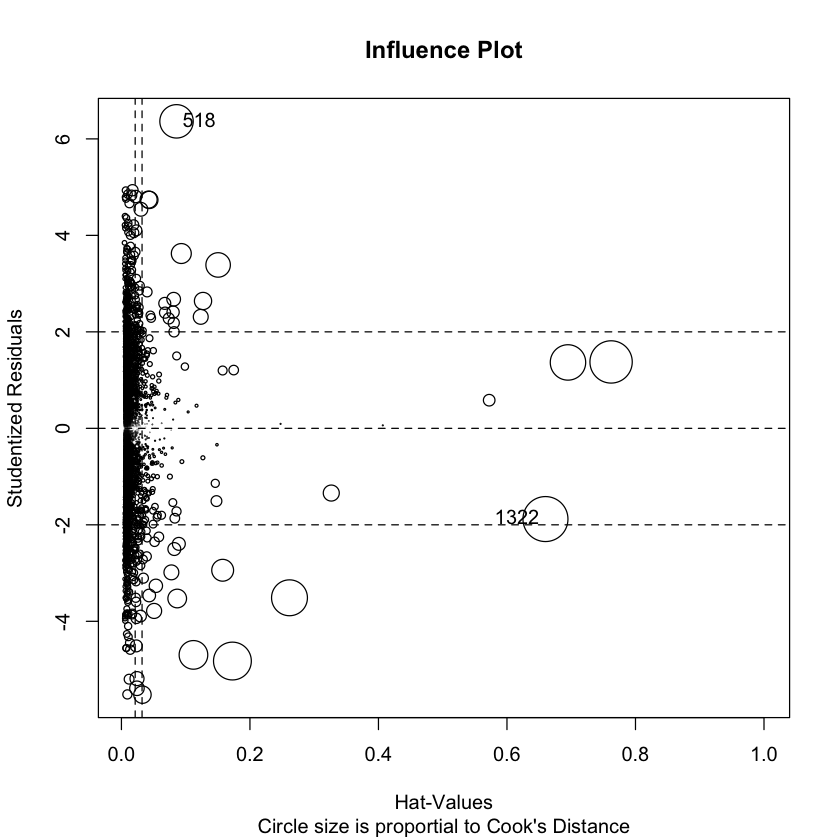

In [61]:
influencePlot(final_model, scale=5, id.method="noteworthy", main="Influence Plot", 
              sub="Circle size is proportial to Cook's Distance" )

Two of the reported influential points are:
* 518 has a large  residual and is also an outlier. The large residual means the model has made a poor prediction for this sample.

Warning message:
“not plotting observations with leverage one:
  6061, 8099”Warning message:
“not plotting observations with leverage one:
  6061, 8099”

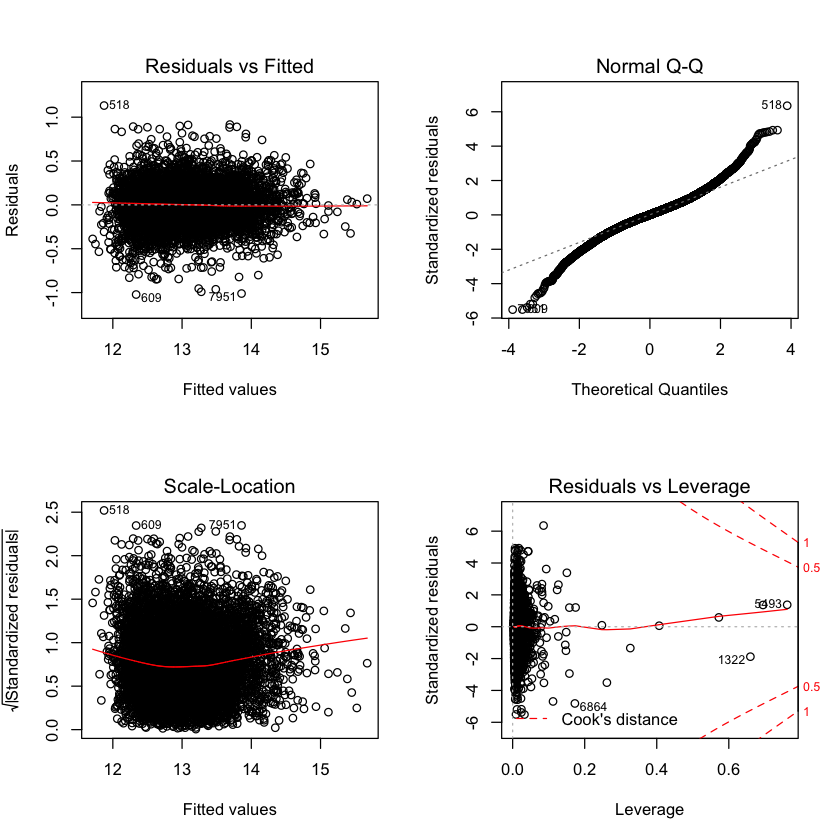

In [62]:
par(mfrow=c(2,2))
plot(final_model)

The model plots show:
* Residual vs Fitted - plot shows the residuals are evenly distributed around zero and error terms are constant along regression line.
* Normal Q-Q - The residuals doesnot have a normal distribution
* Scale-Location - the model folllows the assumption of equal variance.
* Residuals vs Leverage - The plot shows that there are some potential outliers.

#### Re building the model for easy steps to follow

In [63]:
#Building the model
final_model <- lm(formula = log(price) ~ bedrooms + bathrooms + sqft_living + 
    waterfront + condition + grade + yr_built + zipcode + log(sqft_living) + 
    log(sqft_lot) + bathrooms:sqft_living  + sqft_living:bedrooms + 
               sqft_living:grade + yr_built:condition , data = housingdata)

In [64]:
# preparing the dev data
test <- read.csv("dev.csv")
test<-test[-1]
pred_data <- test[-1]

pred_data$grade[pred_data$grade < 3] <- 3 # if any grades are present other than the present in training data, the model will give errors

pred_data$grade <- as.factor(pred_data$grade)
pred_data$waterfront <- as.factor(pred_data$waterfront)
pred_data$zipcode <- as.factor(pred_data$zipcode)
pred_data$condition <- as.factor(pred_data$condition)


In [65]:
## Predicting the prices
pred <- predict(final_model,pred_data)

target<- as.data.frame(cbind(test['price'],exp(pred)))

In [66]:
##Calculating the RMSE
RMSE <- sqrt(sum((test['price'] - exp(pred))^2)/nrow(test))
RMSE

[1] 124529.3

The RMSE of the develovement data using the final model is $124529, which is 23% of the mean price